<h1>Лаборатоная работа по визуалиция данных</h1>
<h2>Текстовое описание набора данных:</h2>
    <div>
      <br/>Данне были взяты по ссылке: <a>https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets</a><br/><br/>
    <b>Краткое описание данных:</b></br></br>
        Архив экзопланет НАСА - это база данных, которая содержит информацию обо всех известных экзопланетах (планетах за пределами нашей солнечной системы), обнаруженных различными космическими миссиями НАСА, наземными обсерваториями и другими источниками. Набор данных включает в себя такую информацию, как название планеты, масса, радиус, расстояние от звезды-хозяина, период обращения и другие физические характеристики. Набор данных также включает информацию о звезде-хозяине, такую как ее название, масса и радиус. Архив регулярно обновляется по мере обнаружения новых экзопланет, и это ценный ресурс для астрономов, изучающих свойства и распределение экзопланет в нашей галактике.
    <div>
<br/>
<div> 
    <h3>Всего имеется 13 колонок</h3> <br/>
    <ul>
    <li><b>name</b>: Название планеты согласно данным НАСА</li> <br/><br/>
    <li><b>distance</b>: расстояние планеты от Земли в световых годах</li> <br/><br/>
    <li><b>stellar_magnitude</b>: Яркость планеты, чем ярче планета, тем меньший номер присваивается планете</li><br/><br/>
    <li><b>planet_type</b>: Тип планеты, эти типы происходят от планет нашей солнечной системы</li><br/><br/>
    <li><b>discovery_year</b>: Год, в котором была открыта планета</li><br/><br/>
    <li><b>mass_multiplier</b>: множитель массы планеты с помощью mass_wrt planet</li><br/><br/>
    <li><b>mass_wrt</b>: масса планеты по сравнению с массой планет нашей Солнечной системы</li><br/><br/>
    <li><b>radius_multiplier</b>: множитель радиуса планеты с помощью radius_wrt planet</li><br/><br/>
    <li><b>radius_wrt</b>: радиус планеты по сравнению с радиусом планет нашей Солнечной системы</li><br/><br/>
    <li><b>orbital_radius</b>: Орбитальный радиус планет, обращающихся вокруг своего солнца</li><br/><br/>
    <li><b>orbital_period</b>: Время в годах, необходимое этим планетам для завершения 1 оборота вокруг своей звезды</li><br/><br/>
    <li><b>eccentricity</b>: эксцентриситет в основном показывает, насколько круговой является траектория обращения по орбите, эксцентриситет, близкий к 0, означает, что траектория обращения по орбите почти круглая.</li><br/><br/>
    <li><b>detection_method</b>: Метод, используемый НАСА для поиска этой экзопланеты</li><br/><br/>
    </ul>
</div>

In [174]:
!pip install category_encoders

     |████████████████████████████████| 81 kB 1.3 MB/s eta 0:00:01


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
sns.set(style="ticks")

In [69]:
data = pd.read_csv('./NASA.csv', sep=",")
data.head(7)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.15,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.11,Jupiter,2.600000,2.700000,0.08,Radial Velocity


In [70]:
print('количество строк {}, количество столбцов {}'.format(data.shape[0], data.shape[1]))

количество строк 5250, количество столбцов 13


In [71]:
data.dtypes

name                  object
distance             float64
stellar_magnitude    float64
planet_type           object
discovery_year         int64
mass_multiplier      float64
mass_wrt              object
radius_multiplier    float64
radius_wrt            object
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method      object
dtype: object

# Количество пустых значений у каждоко столбца

In [72]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(data)

name имеет NAN: 0
distance имеет NAN: 17
stellar_magnitude имеет NAN: 161
planet_type имеет NAN: 0
discovery_year имеет NAN: 0
mass_multiplier имеет NAN: 23
mass_wrt имеет NAN: 23
radius_multiplier имеет NAN: 17
radius_wrt имеет NAN: 17
orbital_radius имеет NAN: 289
orbital_period имеет NAN: 0
eccentricity имеет NAN: 0
detection_method имеет NAN: 0


In [73]:
data.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


# Визуальное исследование данных

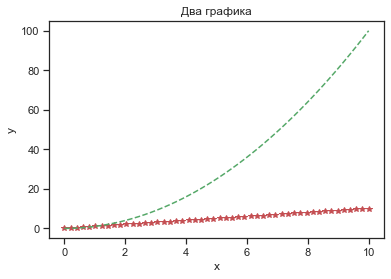

In [74]:
x = np.linspace(0, 10, 50)
y1 = x
y2 = [i**2 for i in x]
plt.plot()
plt.title('Два графика')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y1, 'r*', x, y2, 'g--')

[0.94270418 0.3479972  0.93041646 0.29704065 0.80698153 0.86959353
 0.06156752 0.82721716 0.86867188 0.52393977]


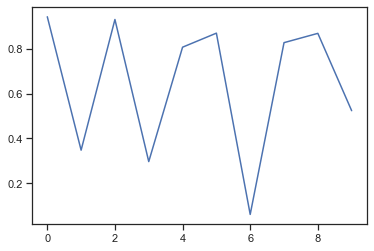

In [76]:
x = np.random.random(10)
print(x)
plt.plot(x)

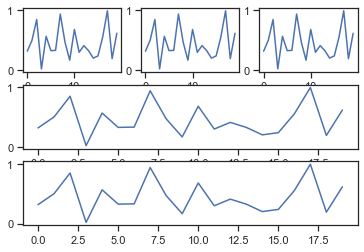

In [77]:
x = np.random.random(20)
ax1 = plt.subplot(3, 3, 1)
ax1.plot(x)

ax2 = plt.subplot(3, 3, 2)
ax2.plot(x)

ax3 = plt.subplot(3, 3, 3)
ax3.plot(x)

ax4 = plt.subplot(3, 1, 2)
ax4.plot(x)

ax5 = plt.subplot(3, 1, 3)
ax5.plot(x)

# Гистрограмма

27727.0


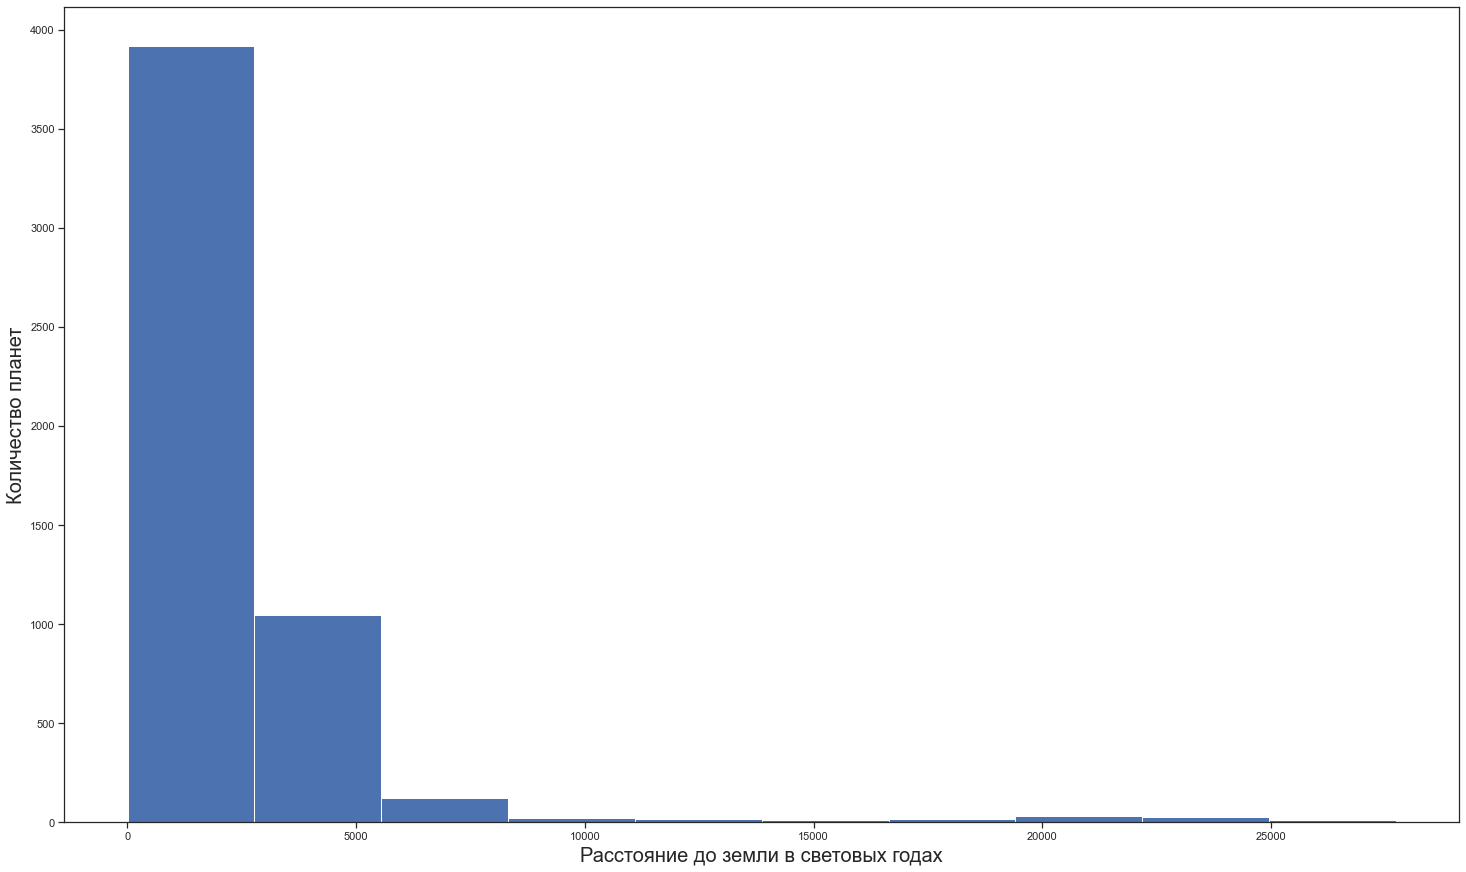

In [78]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot()
ax.set_xlabel("Расстояние до земли в световых годах", fontsize=20 )
ax.set_ylabel("Количество планет", fontsize=20 )
y = data.distance
ax.hist(y)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
print(y.max())

# Круговая диаграмма

In [79]:
data.planet_type.value_counts()

Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: planet_type, dtype: int64

In [80]:
dictinary = [{'col': 'planet_type', 'mapping': {'Neptune-like': 5, 'Gas Giant': 4, 
                            'Super Earth': 3, 'Terrestrial': 2, 'Unknown': 1}}]

encoder = ce.OrdinalEncoder(cols='planet_type', mapping=dictinary)

In [81]:
data_enc = encoder.fit_transform(data)
data_enc['type'] = data.planet_type
data_enc.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,type
0,11 Comae Berenices b,304.0,4.72307,4,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,Gas Giant
1,11 Ursae Minoris b,409.0,5.01300,4,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,Gas Giant
2,14 Andromedae b,246.0,5.23133,4,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,Gas Giant
3,14 Herculis b,58.0,6.61935,4,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,Gas Giant
4,16 Cygni B b,69.0,6.21500,4,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,Gas Giant


<AxesSubplot:ylabel='planet_type'>

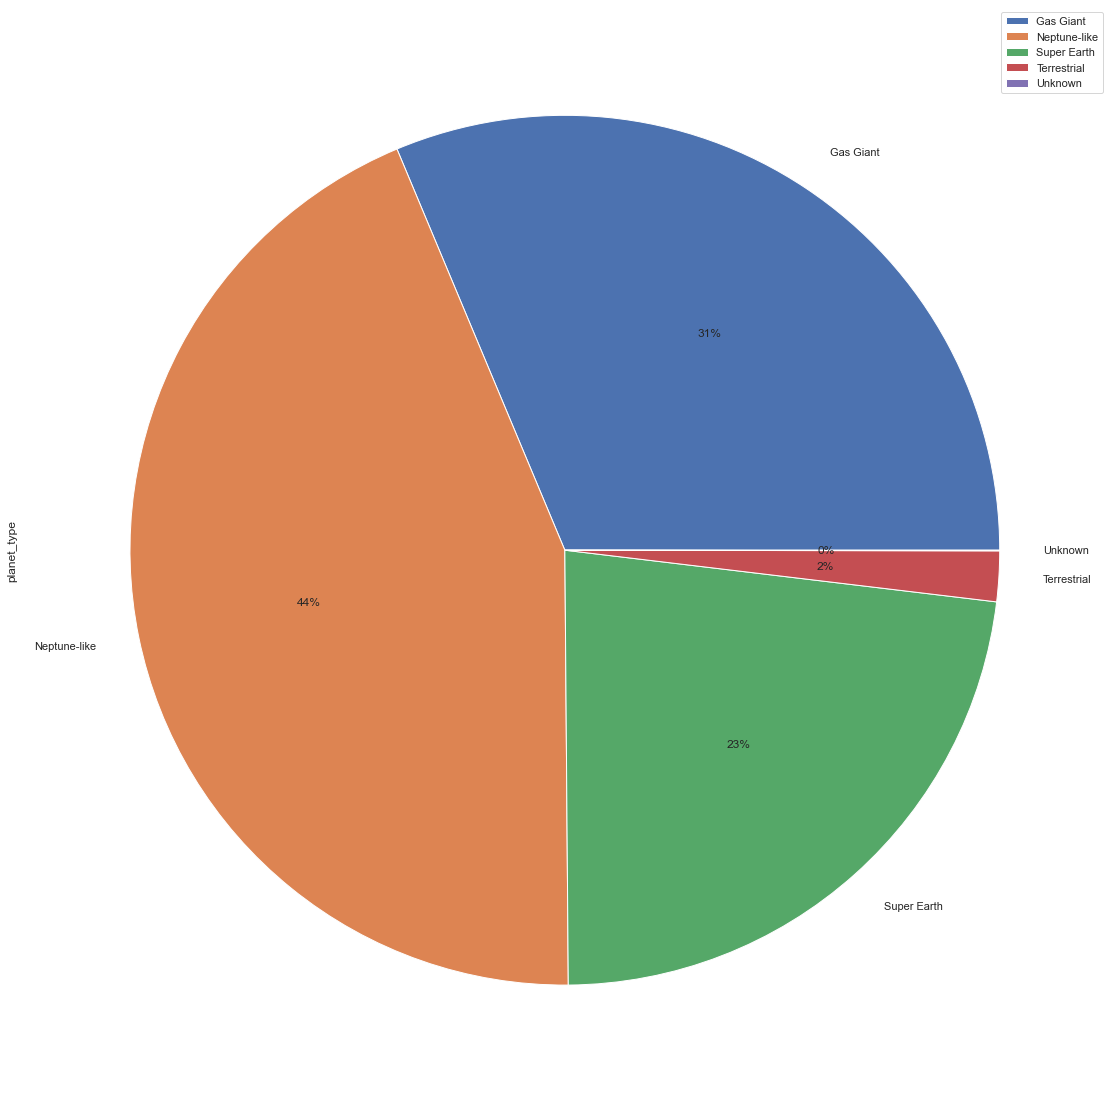

In [82]:
data_enc.groupby(['type']). sum ().plot(kind='pie', y='planet_type', autopct='%1.0f%%', figsize=(20, 20))

# Диаграмма рассеивания

### hex

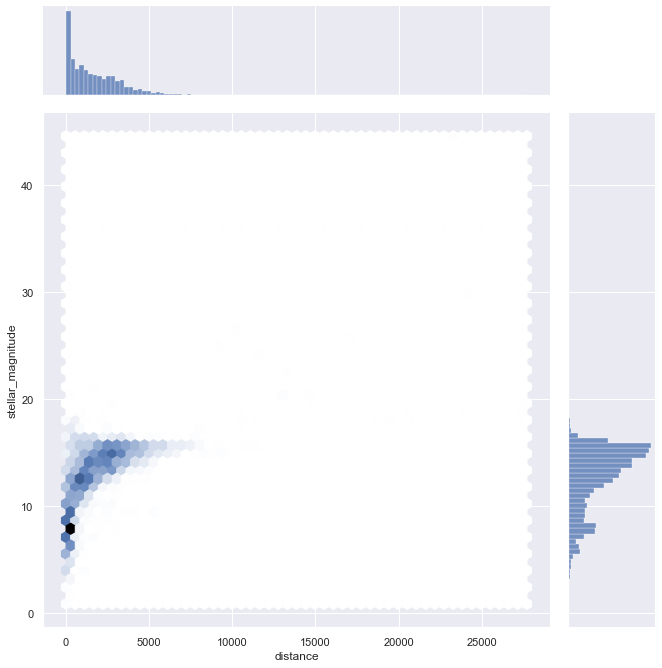

In [122]:
sns.jointplot(x='distance', y='stellar_magnitude', data=data, kind='hex')
plt.gcf().set_size_inches(10, 10)

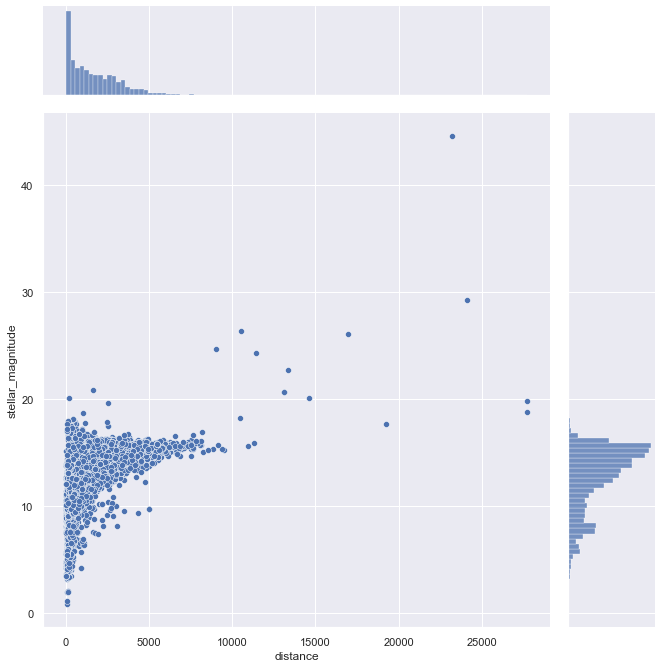

In [124]:
sns.jointplot(x='distance', y='stellar_magnitude', data=data)
plt.gcf().set_size_inches(10, 10)

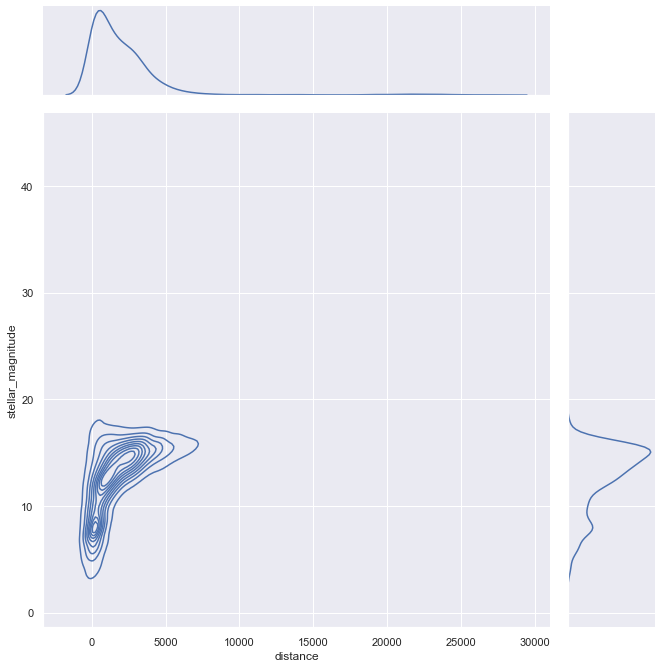

In [126]:
sns.jointplot(x='distance', y='stellar_magnitude', data=data, kind="kde")
plt.gcf().set_size_inches(10, 10)

# Ящик с усиками

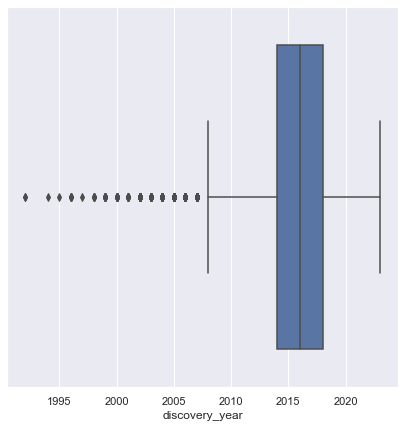

In [131]:
sns.boxplot(x=data['discovery_year'])
plt.gcf().set_size_inches(7, 7)

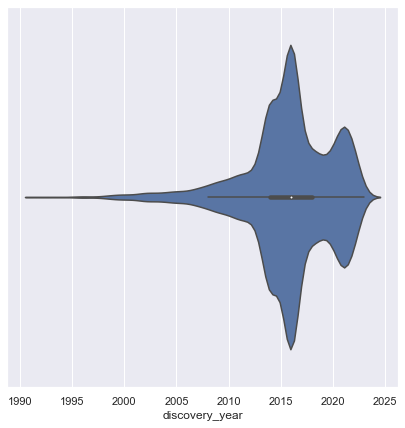

In [133]:

sns.violinplot(x=data['discovery_year'])
plt.gcf().set_size_inches(7, 7)

Index(['distance', 'stellar_magnitude', 'discovery_year', 'mass_multiplier',
       'radius_multiplier', 'orbital_radius', 'orbital_period',
       'eccentricity'],
      dtype='object')


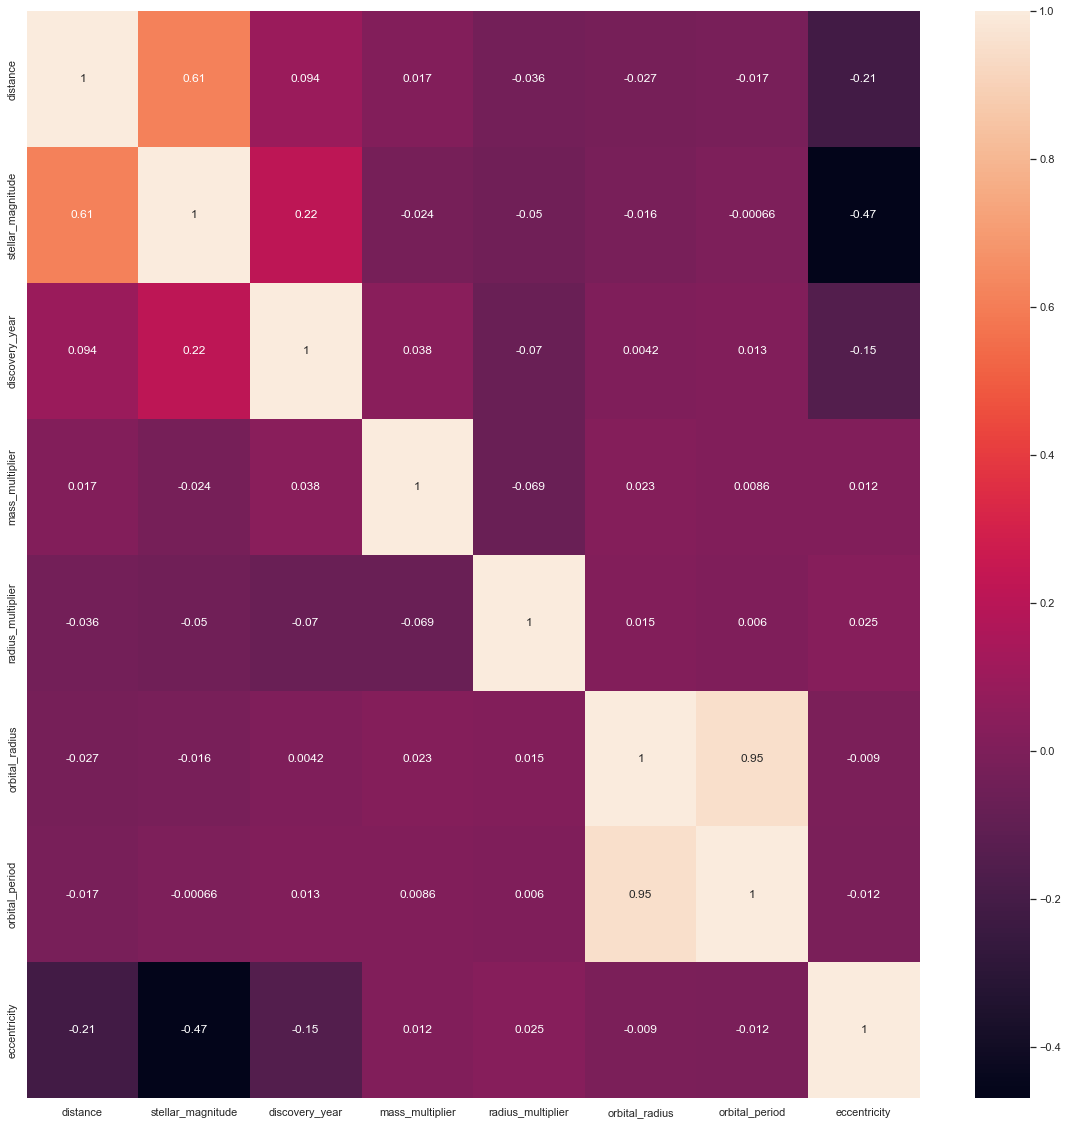

In [143]:
integer_columns = data.select_dtypes(include=['int64', 'float64']).columns
print(integer_columns)
data_int = data[integer_columns]
sns.heatmap(data_int.corr(), annot=True)
plt.gcf().set_size_inches(20, 20)